In [1]:
from coronavirus_analyzer import CoronavirusAnalyzer
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

2020-02-29 22:25:20,779 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


In [2]:
first_date = '2020-01-17'
last_date = '2020-02-14'
sample_cnt = 0
in_english = True
analyzer = CoronavirusAnalyzer(last_date, first_date=first_date, sample_cnt=sample_cnt, in_english=in_english)

In [3]:
# for n in range(1, 11):
#     df = analyzer.get_df_move_inc_corr(n=n).iloc[:, 0::3]
#     print(n, df.mean().mean())

corr: -0.017283767783100236


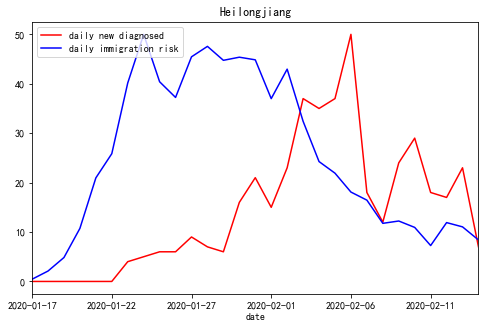

In [4]:
analyzer.plot_move_inc_corr('黑龙江', '2020-02-14', n=3, shift=0, window=1, sample_cnt=sample_cnt)

corr: 0.6542550709612359


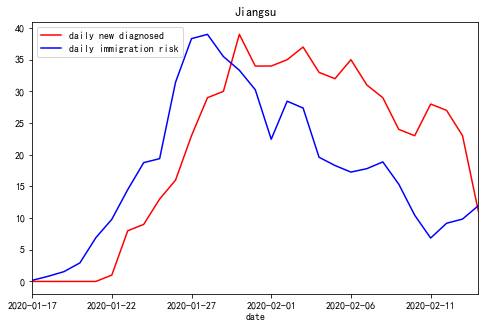

In [5]:
analyzer.plot_move_inc_corr('江苏', '2020-02-14', n=3, shift=0, window=1, sample_cnt=sample_cnt)

corr: 0.8647610302588025


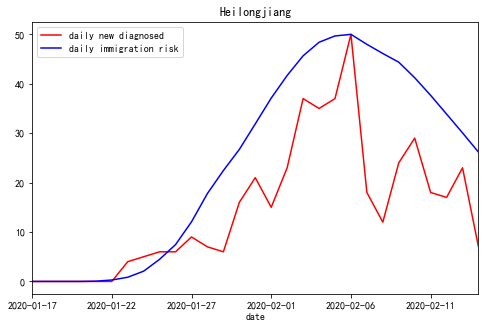

In [6]:
analyzer.plot_move_inc_corr('黑龙江', '2020-02-14')  # , n=3, shift=4, window=10

corr: 0.9665643574051077


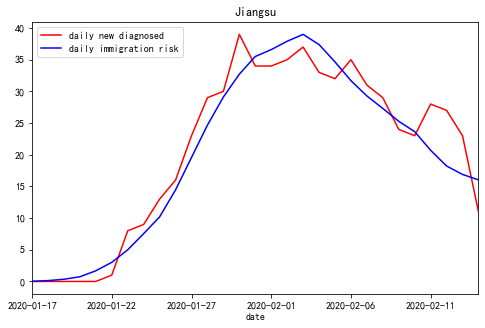

In [7]:
analyzer.plot_move_inc_corr('江苏', '2020-02-14')  # , n=3, shift=0, window=9

In [8]:
last_date = '2020-02-24'
analyzer = CoronavirusAnalyzer(last_date, first_date=first_date, sample_cnt=sample_cnt, in_english=in_english)

df = analyzer.df_move_inc_corr
data = []
for region in df.columns.levels[0]:
    df_region = df[region]
    shift_mean = df_region['shift'].mean()
    window_mean = df_region['window'].mean()
    data.append({'region': region, 'shift mean': shift_mean, 'window mean': window_mean, 'all mean': shift_mean + window_mean})
df_mean = pd.DataFrame(data).sort_values(['all mean', 'shift mean', 'window mean'])
df_mean = df_mean.set_index('region')
df_mean = df_mean.T
df_mean

region,Liaoning,Xizang,Qinghai,Shanghai,Fujian,Zhejiang,Beijing,Yunnan,Chongqing,Guangdong,Shaanxi,Tianjin,Ningxia,Gansu,Jilin,Jiangsu,Sichuan,Shandong,Neimenggu,Hunan,Hainan,Shanxi,Hebei,Guangxi,Xinjiang,Guizhou,Anhui,Henan,Jiangxi,Heilongjiang,Hubei
shift mean,1.147059,1.148148,1.451613,1.333333,1.088235,1.428571,0.861111,1.78125,2.571429,1.189189,2.484848,3.342857,1.000000,1.212121,5.393939,0.588235,1.058824,1.969697,0.727273,3.606061,1.558824,3.352941,2.823529,1.088235,2.575758,4.515152,2.294118,3.971429,4.485714,3.787879,6.378378
window mean,1.411765,1.555556,1.258065,1.500000,2.500000,2.314286,3.083333,2.21875,1.600000,4.027027,2.878788,2.371429,5.060606,5.484848,1.636364,6.617647,6.147059,5.424242,6.787879,4.121212,6.411765,5.117647,6.058824,7.911765,6.787879,5.606061,7.911765,6.371429,6.514286,8.575758,7.378378
all mean,2.558824,2.703704,2.709677,2.833333,3.588235,3.742857,3.944444,4.00000,4.171429,5.216216,5.363636,5.714286,6.060606,6.696970,7.030303,7.205882,7.205882,7.393939,7.515152,7.727273,7.970588,8.470588,8.882353,9.000000,9.363636,10.121212,10.205882,10.342857,11.000000,12.363636,13.756757


In [9]:
df[df_mean.columns]

Liaoning                 Xizang                Qinghai        \
                corr shift window      corr shift window      corr shift   
2020-01-17       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-18       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-19       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-20       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-21       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-22  1.000000   5.0    5.0       NaN   NaN    NaN       NaN   NaN   
2020-01-23  0.819636   1.0    1.0       NaN   NaN    NaN       NaN   NaN   
2020-01-24  0.972306   7.0    1.0       NaN   NaN    NaN       NaN   NaN   
2020-01-25  0.930973   3.0    1.0       NaN   NaN    NaN  1.000000   8.0   
2020-01-26  0.850410   1.0    1.0       NaN   NaN    NaN  0.994995   7.0   
2020-01-27  0.841992   1.0    1.0       NaN   NaN    NaN  0.905532   5.0   
2020-01-28  0.887108   1.0    1.0       NaN   NaN    NaN  0.583131   0.0   
2020-01-29  0.770369   1.0    1.0  0.908678  10.0    5.0  0.434434   0.0   
2020-01-30  0.782095   1.0    1.0  0.551845   5.0    1.0  0.515695   0.0   
2020-01-31  0.820739   4.0    1.0  0.371958   3.0    1.0  0.514544   0.0   
2020-02-01  0.739700   1.0    1.0  0.314258   1.0    1.0  0.472478   0.0   
2020-02-02  0.743684   1.0    1.0  0.287863   1.0    1.0  0.580662   7.0   
2020-02-03  0.751122   1.0    1.0  0.264429   1.0    1.0  0.578586   6.0   
2020-02-04  0.744069   1.0    1.0  0.246631   1.0    1.0  0.597198   6.0   
2020-02-05  0.729910   1.0    1.0  0.242735   1.0    1.0  0.559343   6.0   
2020-02-06  0.729779   1.0    1.0  0.241851   1.0    1.0  0.496007   0.0   
2020-02-07  0.729205   1.0    1.0  0.244023   1.0    1.0  0.497183   0.0   
2020-02-08  0.714344   1.0    1.0  0.244616   1.0    1.0  0.499039   0.0   
2020-02-09  0.716084   1.0    1.0  0.245538   1.0    1.0  0.507021   0.0   
2020-02-10  0.719142   1.0    1.0  0.243930   1.0    1.0  0.509212   0.0   
2020-02-11  0.720783   1.0    1.0  0.244932   1.0    1.0  0.516061   0.0   
2020-02-12  0.706017   1.0    1.0  0.247411   1.0    1.0  0.520916   0.0   
2020-02-13  0.708523   1.0    1.0  0.249848   1.0    1.0  0.521267   0.0   
2020-02-14  0.709396   1.0    1.0  0.244102   0.0    2.0  0.528218   0.0   
2020-02-15  0.708260   0.0    2.0  0.246346   0.0    2.0  0.535706   0.0   
2020-02-16  0.716401   0.0    2.0  0.248455   0.0    2.0  0.542300   0.0   
2020-02-17  0.728013   0.0    2.0  0.250411   0.0    2.0  0.548532   0.0   
2020-02-18  0.738486   0.0    2.0  0.252227   0.0    2.0  0.554156   0.0   
2020-02-19  0.747826   0.0    2.0  0.253621   0.0    2.0  0.559287   0.0   
2020-02-20  0.755262   0.0    2.0  0.254803   0.0    2.0  0.564077   0.0   
2020-02-21  0.761060   0.0    2.0  0.255878   0.0    2.0  0.568451   0.0   
2020-02-22  0.767026   0.0    2.0  0.256810   0.0    2.0  0.572544   0.0   
2020-02-23  0.773067   0.0    2.0  0.257340   0.0    2.0  0.576076   0.0   
2020-02-24  0.778308   0.0    2.0  0.257172   0.0    2.0  0.579288   0.0   

                   Shanghai                 Fujian               Zhejiang  \
           window      corr shift window      corr shift window      corr   
2020-01-17    NaN       NaN   NaN    NaN       NaN   NaN    NaN       NaN   
2020-01-18    NaN       NaN   NaN    NaN       NaN   NaN    NaN       NaN   
2020-01-19    NaN       NaN   NaN    NaN       NaN   NaN    NaN       NaN   
2020-01-20    NaN  1.000000   3.0    1.0       NaN   NaN    NaN       NaN   
2020-01-21    NaN  0.998789   3.0    1.0       NaN   NaN    NaN  1.000000   
2020-01-22    NaN  0.975092   3.0    1.0  1.000000   5.0    3.0  0.918001   
2020-01-23    NaN  0.875797   3.0    1.0  0.993630   4.0    1.0  0.987268   
2020-01-24    NaN  0.940807   3.0    1.0  0.996053   6.0    2.0  0.887503   
2020-01-25    1.0  0.833522   3.0    1.0  0.924437   3.0    1.0  0.939034   
2020-01-26    3.0  0.832341   3.0    2.0  0.9556

In [10]:
df[df_mean.columns].to_excel('人流和新增相关性分析 {}.xlsx'.format(last_date))

In [10]:
last_date = '2020-02-28'
sample_cnt = 14
analyzer = CoronavirusAnalyzer(last_date, first_date='2020-01-17', sample_cnt=sample_cnt)
analyzer.df_virus_daily_inc_injured

,北京,天津,河北,山西,内蒙古,辽宁,吉林,黑龙江,上海,江苏,浙江,安徽,福建,江西,山东,河南,湖北,湖南,广东,广西,海南,重庆,四川,贵州,云南,西藏,陕西,甘肃,青海,宁夏,新疆
日期,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-20,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,72,0,16,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-21,5,2,0,0,0,0,0,0,8,0,5,0,0,2,0,1,105,0,9,0,0,5,0,0,0,0,0,0,0,0,0
2020-01-22,4,2,1,1,0,2,0,0,7,1,5,9,1,1,0,3,69,0,6,2,4,4,7,0,0,0,0,0,0,0,0
2020-01-23,12,1,1,0,1,1,3,4,4,8,33,6,2,4,9,5,105,24,21,11,4,18,8,3,0,0,3,2,0,2,2
2020-01-24,10,3,6,5,1,9,1,5,13,9,19,24,15,11,12,23,180,19,25,10,9,30,13,1,5,0,2,2,0,1,1
2020-01-25,15,2,5,3,3,7,0,6,7,13,42,21,11,18,18,51,323,26,33,10,2,18,16,1,6,0,17,3,1,1,1
